In [113]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns


In [101]:
x = np.random.lognormal(2, 1, size = 100000)

<Axes: ylabel='Count'>

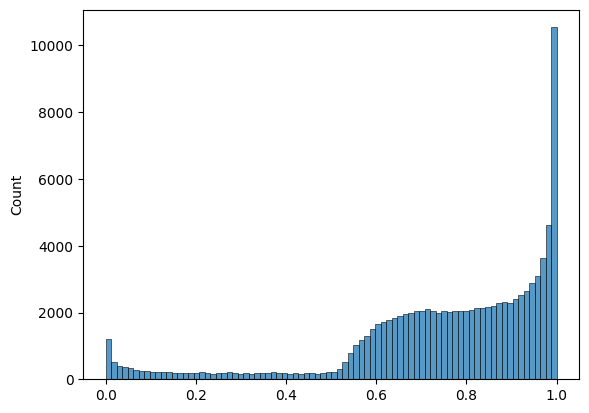

In [237]:
y = np.random.lognormal(0,1,size=100000)
sns.histplot((np.sin(y)+1)/2)

In [102]:
z = (np.sin(x)+1)/2

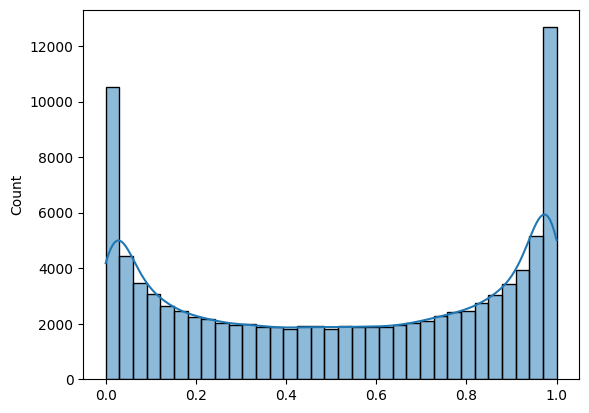

In [103]:
sns.histplot(z, kde=True);

In [104]:
sample = np.random.choice(z,size=10000, replace=False)

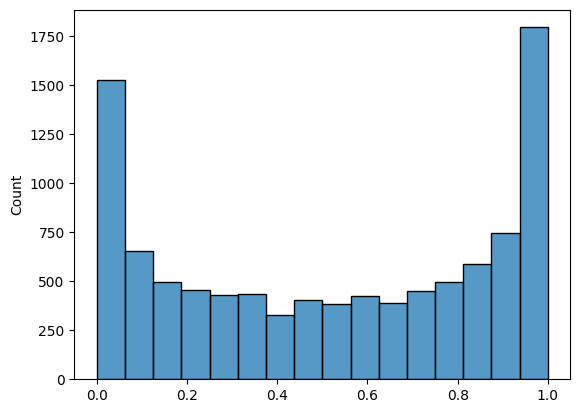

In [106]:
sns.histplot(sample);

In [238]:
p_value_1 = []
p_value_2 = []
type_one_error_1 = []
type_one_error_2 = []
power_1 = []
power_2 = []
alpha = 0.05
mde = 0.1

for i in range(1000):
    sample = np.random.choice(y, 50000)
    test = sample[:5000]
    control = sample[5000:]
    p_1 = stats.ttest_ind(test, control, equal_var=False)[1]
    p_value_1.append(p_1)
    type_one_error_1.append(p_1<=alpha)
    p_2 = stats.mannwhitneyu(test, control, alternative = 'two-sided')[1]
    p_value_2.append(p_2)
    type_one_error_2.append(p_2<=alpha)
    # test2 = test*(1+mde)
    test2 = np.sin(1+np.random.lognormal(0,1,len(control)))
    p2 = stats.ttest_ind(test2, control, equal_var=False)[1]
    

    power_1.append(p2<=0.05)
    power_2.append(stats.mannwhitneyu(test2, control, alternative='two-sided')[1]<=0.05)
    




In [239]:
np.mean(power_2)

1.0

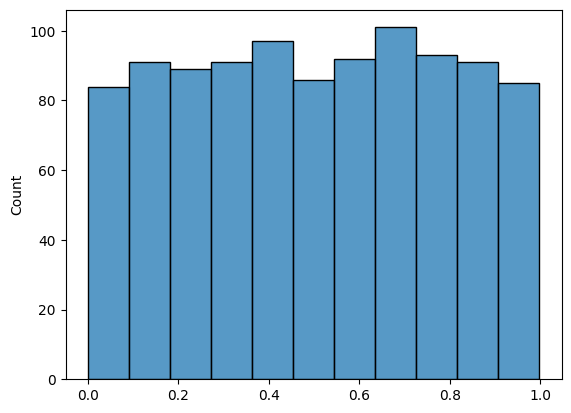

In [240]:
sns.histplot(p_value_1);

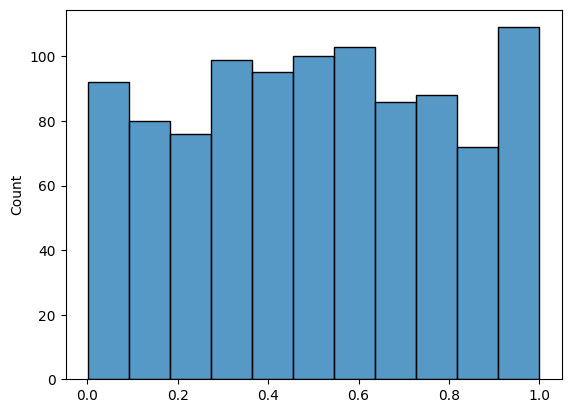

In [241]:
sns.histplot(p_value_2);

In [243]:
data = pd.DataFrame({'ttest':p_value_1, 'mann_whitney':p_value_2})

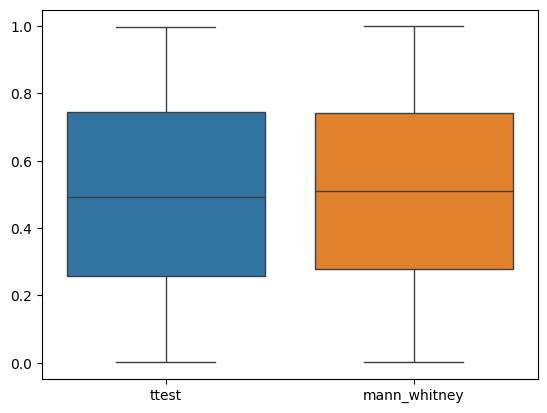

In [244]:
sns.boxplot(data);

In [245]:
data_2 = pd.DataFrame({'ttest':np.array(power_1, dtype=int), 'mann_whitney':np.array(power_2, dtype=int)})

<Axes: >

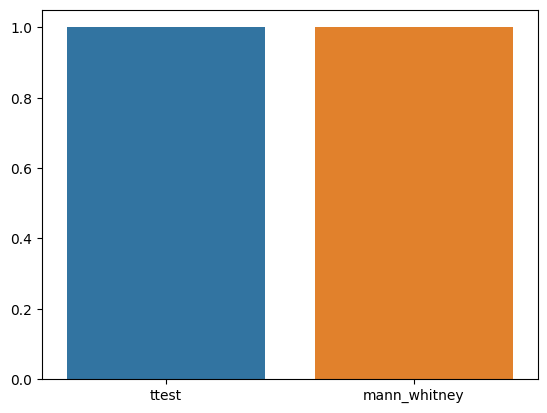

In [246]:
sns.barplot(data_2)

In [181]:
np.mean(type_one_error_2)

0.06